In [1]:
from shared import *
from utils.wearable_fit import get_all_gotchi_wearable_fit_counts_df, get_changes_to_fit_count_stddev_df

wearable_types_df = get_wearable_types_df()

## Simulated Impact of New Schematics on Gameplay Balance Over Time

The simulation featured here provides valuable insights into the potential impact of releasing new schematics on gameplay balance in the Aavegotchi protocol. Utilizing the standard deviation of fit counts across all wearables as a key performance metric, you can trace the prospective evolution of gameplay balance with the introduction of additional schematics over time. (For more information on the methodology for calculating trait balance, see the [Wearable Trait Selection: A Quantitative Approach](https://docs.google.com/document/d/1D9e2FEh5NnYXrPEK28UF7GWpsI1ybOsCY94x1kGCpJs/edit?usp=drive_link) litepaper.)

The X-axis of our line chart represents the number of schematics released, while the Y-axis denotes the standard deviation of fit count (lower values indicate more balanced wearable trait distribution). This simulation,assumes a simplified methodology that is optimized for broad balance across the protocol irrespective of slot/rarity. It is important to note that in a more complex real-world application, the methodology should be considered separately for each slot/rarity combination, and there may be instances where it is not possible to follow the methodology perfectly. Consequently, the precise number of new schematics required to achieve balance might deviate from this estimate. Nevertheless, the simulation serves as a useful guideline for the path to balanced gameplay in the Aavegotchi universe.


In [2]:
def add_wearable_type_with_traits(wearable_types_before_df, traits):
    wearable_type_to_add = {'NRG': 0, 'AGG': 0, 'SPK': 0, 'BRN': 0} 
    for trait in ['NRG', 'AGG', 'SPK', 'BRN']:
        if f"{trait}+" in traits:
            wearable_type_to_add[trait] = 1
        elif f"{trait}-" in traits:
            wearable_type_to_add[trait] = -1
    return pd.concat([wearable_types_before_df, pd.DataFrame(wearable_type_to_add, index=[0])], ignore_index=True)

In [3]:
num_wearables_to_simulate = 100
all_gotchi_wearable_fit_counts = get_all_gotchi_wearable_fit_counts_df(wearable_types_df)
stddev_of_fit_count = all_gotchi_wearable_fit_counts['fit_count'].std()
simulation_results = [[[], stddev_of_fit_count]]
simulated_wearable_types_df = wearable_types_df.copy()
for i in range(num_wearables_to_simulate):
    next_best_wearable = get_changes_to_fit_count_stddev_df(simulated_wearable_types_df).sort_values(by='change_in_fit_count_stddev', ascending=True, inplace=False).iloc[0]
    simulated_wearable_types_df = add_wearable_type_with_traits(simulated_wearable_types_df, next_best_wearable['trait_modifiers_to_add'])
    stddev_of_fit_count += next_best_wearable['change_in_fit_count_stddev'] # get_all_gotchi_wearable_fit_counts_df(simulated_wearable_types_df)['fit_count'].std()
    simulation_results.append([next_best_wearable['trait_modifiers_to_add'], stddev_of_fit_count])
simulation_df = pd.DataFrame(simulation_results, columns=['trait_modifiers', 'stddev_of_fit_count'])

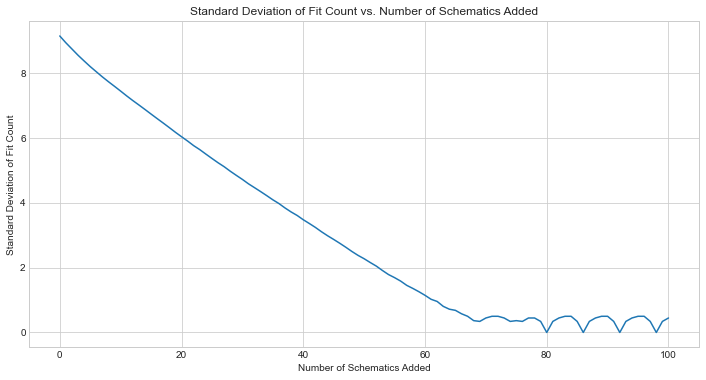

In [4]:
plt.figure(figsize=(12,6))
plt.plot(simulation_df.index, simulation_df['stddev_of_fit_count'])
plt.xlabel('Number of Schematics Added')
plt.ylabel('Standard Deviation of Fit Count')
plt.title('Standard Deviation of Fit Count vs. Number of Schematics Added')
plt.show()